<a href="https://colab.research.google.com/github/Ritika-mishra412/-data-analysis-project-/blob/main/google_search_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# GOOGLE SEARCH ANALYSIS PROJECT

In [56]:
# Q-1) first, write a code where, by changing just the keyword, we can search for multiple things
# Q-2) top 15 countries where the key words are searched the most, and also create a visual representations of
# Q-3) A world map needs to be plotted shhowing the countries that search the keyword the most
# Q-4) we need to extract the time-wise intrest of the keywords-- how it trended in diifferent years.
# Q-5) Compare related keywords and plot the graph

In [57]:
# pytrends == pytrends is an unofficial Python library that allows you to access the Google Trends API. It can be used to automate tasks like:

# Searching for keywords and topics.
# Getting the top countries and regions where a keyword is searched.
# Analyzing the time-wise interest of keywords.
# Comparing related keywords.
# Essentially, it helps you programmatically interact with Google Trends data   for analysis and research.
#useful for market research,trend forecasting, comptetive analysis

In [58]:
pip install pytrends matplotlib pandas seaborn plotly

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

In [60]:
#setup pytrend library and keyword define

In [61]:
pytrend=TrendReq(hl = 'en-US', tz=360)
keyword='digital marketing'

In [62]:
pytrend.build_payload(kw_list=[keyword], cat = 0, timeframe='today 12-m', geo = '', gprop = '')

In [63]:
#country wise intrest

In [65]:
region_data = pytrend.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)


<ipython-input-66-36878643>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




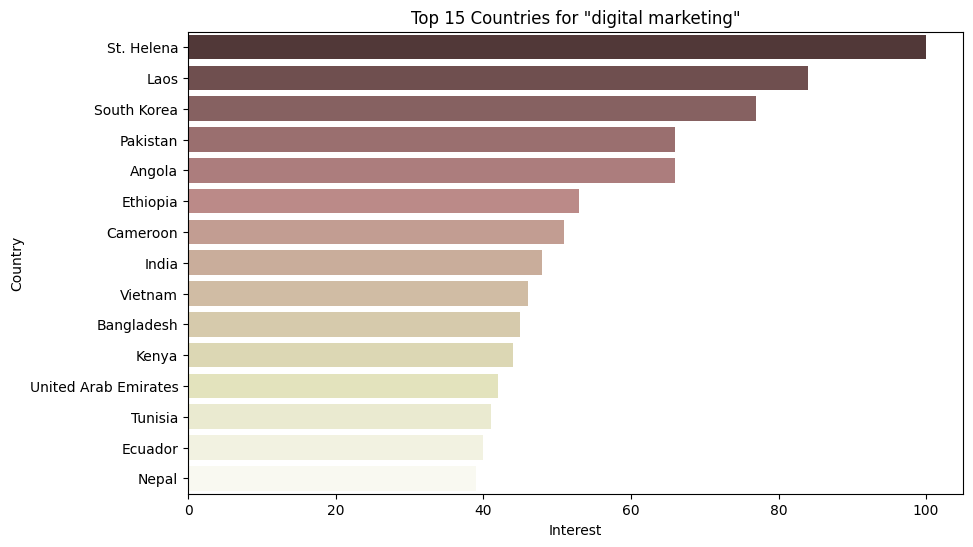

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_data[keyword],y= region_data.index, palette='pink')
plt.ylabel('Country')
plt.xlabel('Interest')
plt.title(f'Top 15 Countries for "{keyword}"')
plt.show()

In [69]:
#world map

In [83]:
#Check what’s inside your DataFrame
print(region_data.head())
print(region_data.columns)


             digital marketing
geoName                       
St. Helena                 100
Laos                        84
South Korea                 77
Pakistan                    66
Angola                      66
Index(['digital marketing'], dtype='object')


In [84]:
#Ensure your DataFrame has two required columns:
# Sample structure
region_data = pd.DataFrame({
    'geoName': ['India', 'United States', 'Germany', 'France', 'Brazil'],
    'digital marketing': [78, 91, 65, 74, 69]
})

In [85]:
import plotly.express as px

fig = px.choropleth(
    region_data,
    locations='geoName',
    locationmode='country names',
    color=keyword,
    title=f"Search interest for '{keyword}' by country",
    color_continuous_scale='pinkyl')

fig.show()

In [86]:
#time-wise intrest

In [87]:
time_df = pytrend.interest_over_time()


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Text(0, 0.5, 'Interest')

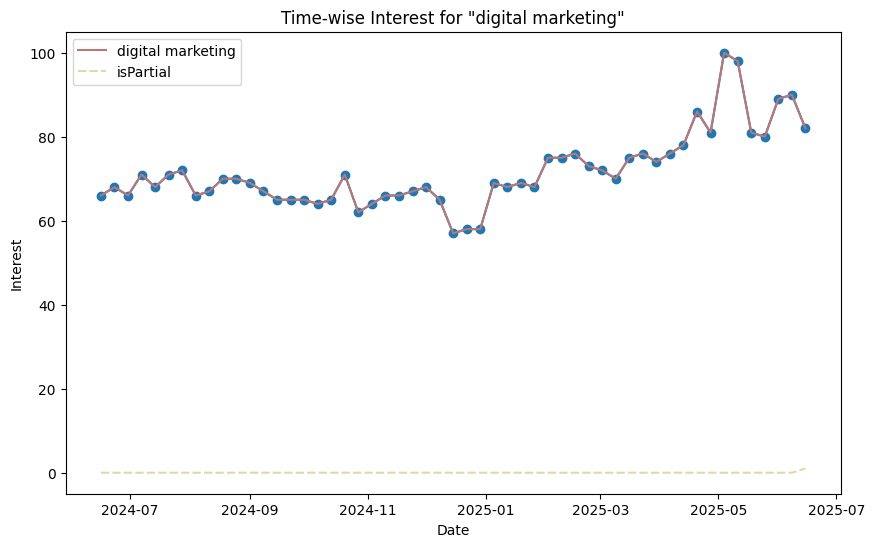

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(time_df.index, time_df[keyword], marker='o', linestyle='-')
sns.lineplot(data=time_df, palette='pink')
plt.title(f'Time-wise Interest for "{keyword}"')
plt.xlabel('Date')
plt.ylabel('Interest')

In [89]:
#multiple keyword compare

In [90]:
kw_list={"data science","cloude computing","digital marketing","machine learning"}
pytrend.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



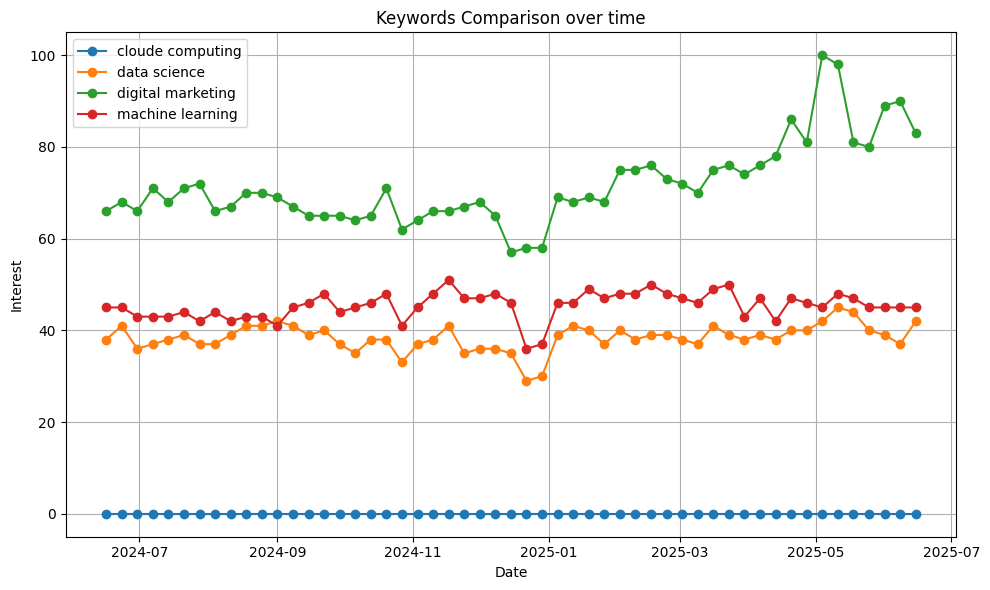

In [91]:
compare_df = pytrend.interest_over_time()
plt.figure(figsize=(10, 6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], marker='o', linestyle='-', label=kw)
    plt.title(f'Keywords Comparison over time')
    plt.xlabel('Date')
    plt.ylabel('Interest')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
plt.show()